In [6]:
import pandas as pd

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Check for missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Data Cleaning

In [8]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most common value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)
# Confirm that all missing values were handled
df.isnull().sum()



/tmp/ipython-input-1732241792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1732241792.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


✅ Cleaning Summary:
- Filled missing `Age` with median
- Filled missing `Embarked` with mode
- Dropped `Cabin` due to excessive missing values

Missing Values Check

In [9]:
# Survival rate overall
df['Survived'].value_counts(normalize=True) * 100


,proportion
Survived,
0,61.616162
1,38.383838


✅ All missing values have been handled successfully.

In [11]:
# Survival rate by gender as percentages
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
survival_by_gender = survival_by_gender.round(2)

# Display the result
print(survival_by_gender)



Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


In [13]:
# Survival by passenger class
df.groupby('Pclass')['Survived'].mean()*100


,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [14]:
# Survival by embarkation port
df.groupby('Embarked')['Survived'].mean()*100


,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.900929


# Exploratory Data Analysis (EDA)

🔹 Survival by Gender



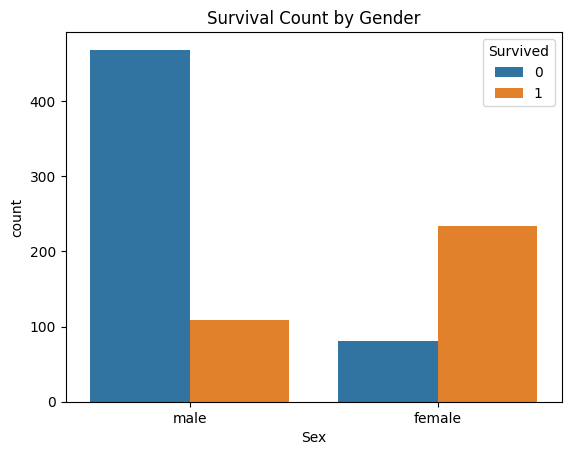

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()


- Females had a much higher survival rate (74%) compared to males (~19%).


🔹 Survival by Passenger Class



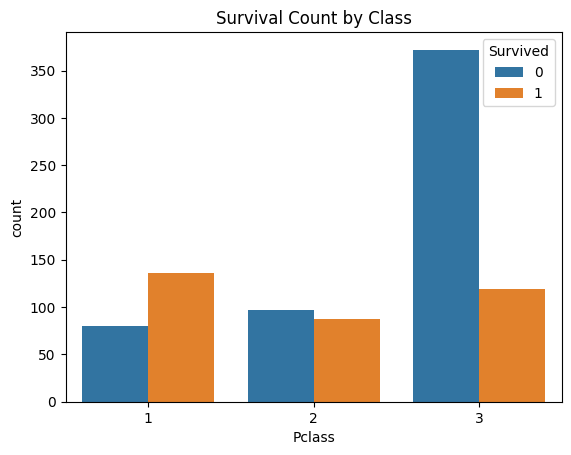

In [16]:
# 2. Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Class')
plt.show()


- 1st class passengers were more likely to survive.


🔹 Age Distribution of Survivors



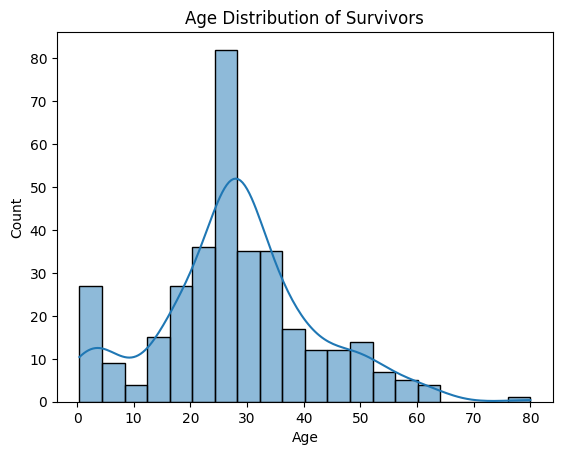

In [17]:
# 3. Age Distribution of Survivors
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, bins=20)
plt.title('Age Distribution of Survivors')
plt.show()


- Most survivors were aged 20–30.
- Young children (0–5) also had high survival.

🔹 Correlation Heatmap




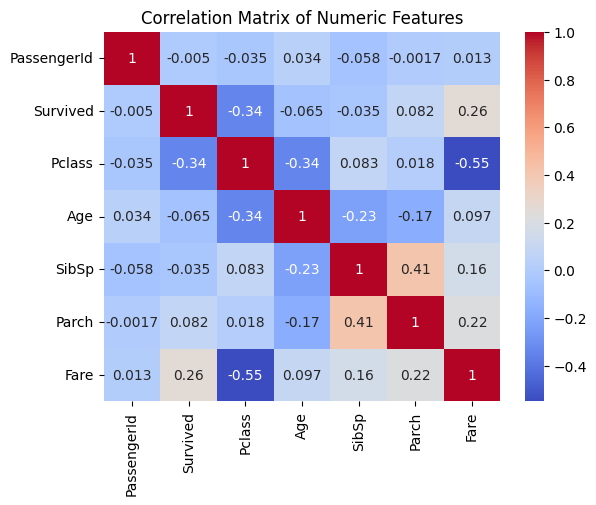

In [19]:
# 4. Correlation Heatmap
# Select only numeric columns to avoid string-to-float errors
numeric_df = df.select_dtypes(include='number')
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix only on numeric columns
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


- Strongest negative correlation: Pclass vs. Fare (-0.55)
- Survival positively correlates with Fare (+0.26)

Age and Gender Distribution by Survival Status

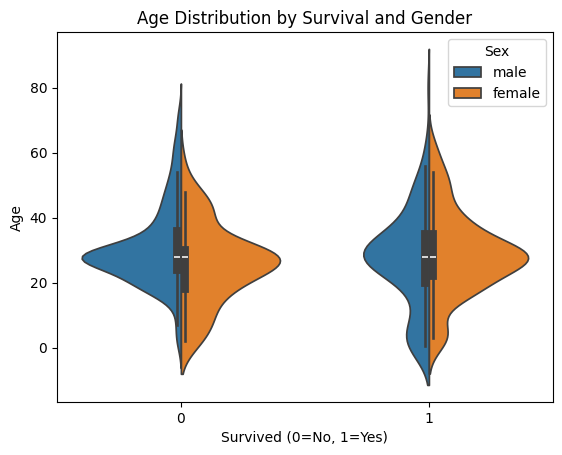

In [20]:
sns.violinplot(x='Survived', y='Age', hue='Sex', data=df, split=True)
plt.title('Age Distribution by Survival and Gender')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.show()


- Most **non-survivors** were **males aged 20–40**, as shown in the left violin.
- The majority of **survivors were females**, with a broad age range — confirming the “women and children first” policy.
- A noticeable number of **young children** (under 10) survived, from both genders.
- Very few elderly passengers survived.